In [1]:
# Initial imports
import pandas as pd
from path import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Laod the csv dataset
file = "./Resources/games.csv"
games_df = pd.read_csv(file)
games_df

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Domains
0,174430,Gloomhaven,2017,1,4,120,14,42055,8.79,1,3.86,68323,"Strategy Games, Thematic Games"
1,161936,Pandemic Legacy: Season 1,2015,2,4,60,13,41643,8.61,2,2.84,65294,"Strategy Games, Thematic Games"
2,224517,Brass: Birmingham,2018,2,4,120,14,19217,8.66,3,3.91,28785,Strategy Games
3,167791,Terraforming Mars,2016,1,5,120,12,64864,8.43,4,3.24,87099,Strategy Games
4,233078,Twilight Imperium: Fourth Edition,2017,3,6,480,14,13468,8.70,5,4.22,16831,"Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20315,16398,War,0,2,2,30,4,1340,2.28,20340,1.00,427,Children's Games
20316,7316,Bingo,1530,2,99,60,5,2154,2.85,20341,1.05,1533,Party Games
20317,5048,Candy Land,1949,2,4,30,3,4006,3.18,20342,1.08,5788,Children's Games
20318,5432,Chutes and Ladders,-200,2,6,30,3,3783,2.86,20343,1.02,4400,Children's Games


In [3]:
# describe data
statistic_df = games_df.drop("ID", axis = 1)
statistic_df.describe()

,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000,20320.000000
mean,1984.226230,2.019636,5.673327,91.326772,9.600246,841.778691,6.403363,10170.563976,1.990994,1408.457628
std,214.117399,0.690545,15.239657,545.749554,3.645790,3513.464339,0.935762,5873.389392,0.849022,5040.179315
min,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5084.750000,1.330000,146.000000
50%,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10168.500000,1.970000,309.000000
75%,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.250000,2.540000,864.000000
max,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


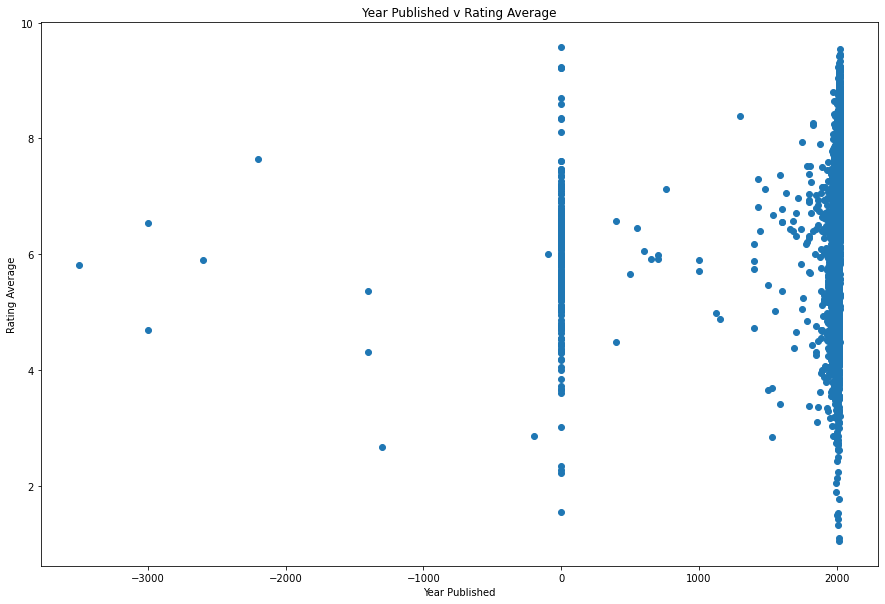

In [4]:
# Plot the results
plt.figure(figsize= (15,10))
plt.scatter(games_df["Year Published"], games_df["Rating Average"])
plt.xlabel('Year Published')
plt.ylabel('Rating Average')
plt.title("Year Published v Rating Average")
plt.show()

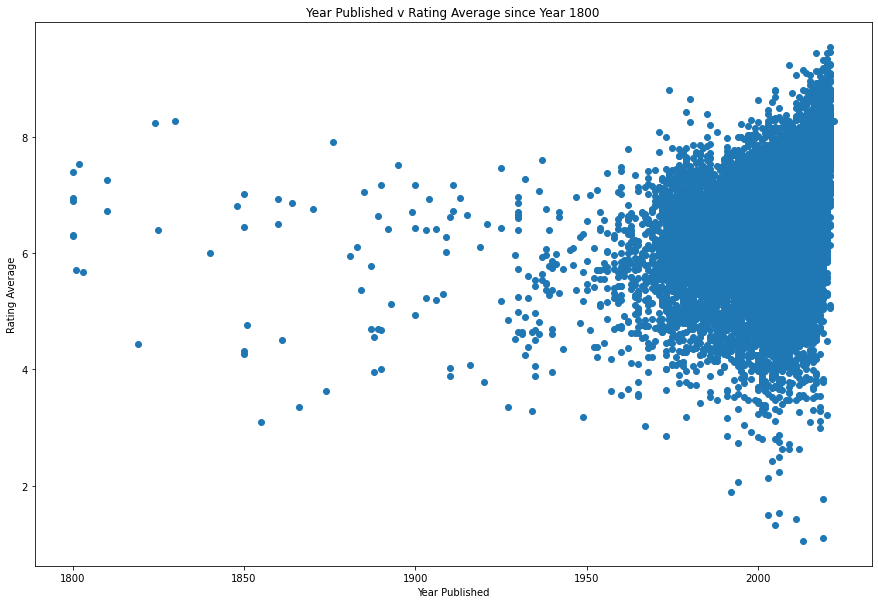

In [5]:
# Games pusblished before 1800 removed.
games_df[games_df['Year Published'] < 1800].index
games_df.drop(games_df[games_df['Year Published'] < 1800].index, inplace = True)
# Plot Year Published v Rating Average
plt.figure(figsize= (15,10))
plt.scatter(games_df["Year Published"], games_df["Rating Average"])
plt.xlabel('Year Published')
plt.ylabel('Rating Average')
plt.title('Year Published v Rating Average since Year 1800')
plt.show()

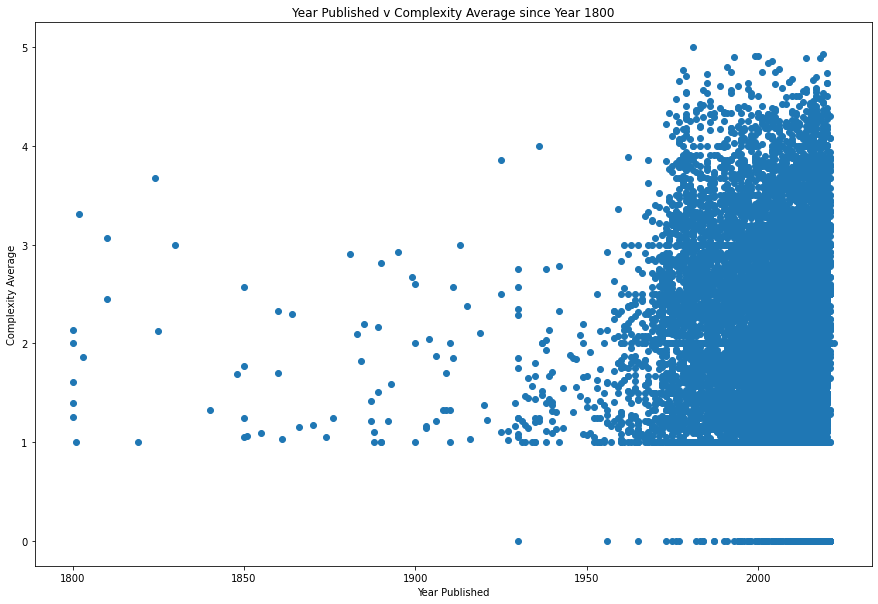

In [6]:
# Games pusblished before 1800 removed.
games_df[games_df['Year Published'] < 1800].index
games_df.drop(games_df[games_df['Year Published'] < 1800].index, inplace = True)
# Plot Year Published v Rating Average
plt.figure(figsize= (15,10))
plt.scatter(games_df["Year Published"], games_df["Complexity Average"])
plt.xlabel('Year Published')
plt.ylabel('Complexity Average')
plt.title("Year Published v Complexity Average since Year 1800")
plt.show()

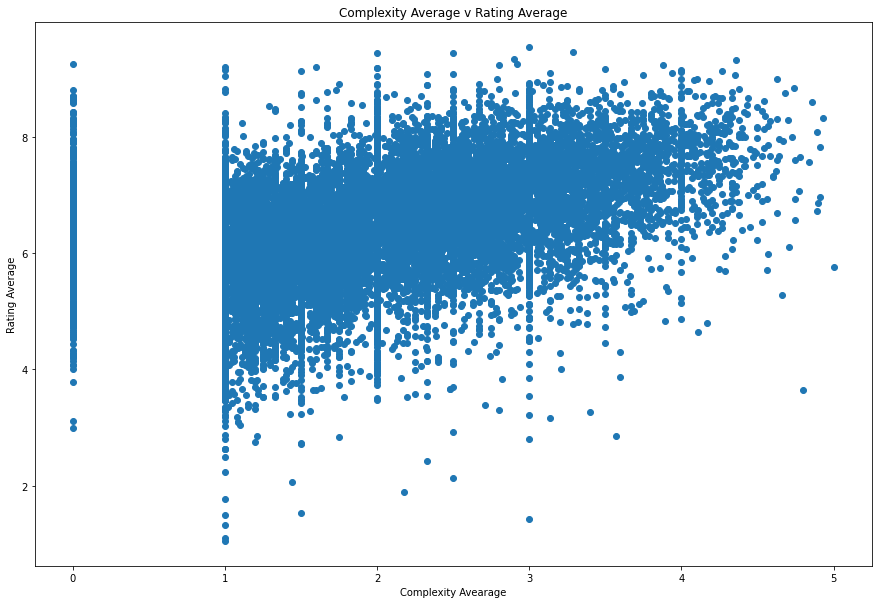

In [7]:
# Games pusblished before 1800 removed.
games_df[games_df['Year Published'] < 1800].index
games_df.drop(games_df[games_df['Year Published'] < 1800].index, inplace = True)
# Plot Complexity v Rating Average
plt.figure(figsize= (15,10))
plt.scatter(games_df["Complexity Average"], games_df["Rating Average"])
plt.xlabel('Complexity Avearage')
plt.ylabel('Rating Average')
plt.title('Complexity Average v Rating Average')
plt.show()

In [8]:
# Reshape X to fix value error when fitting model
X = games_df["Complexity Average"].values.reshape(-1, 1)

In [9]:
# Define X and y
y = games_df["Rating Average"]

In [10]:
# Define the model
model = LinearRegression()

In [11]:
# Fit the Model
model.fit(X, y)

LinearRegression()

In [12]:
# Create predictions
y_pred = model.predict(X)
print(y_pred.shape)

(20071,)


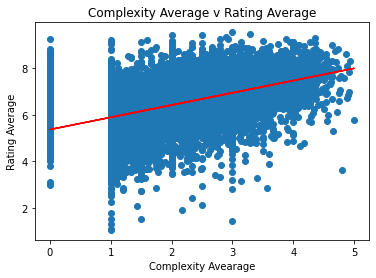

<Figure size 1080x720 with 0 Axes>

In [13]:
# Plot prediction red line through the actual plots of Complexity and Rating Average
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Complexity Avearage')
plt.ylabel('Rating Average')
plt.title("Complexity Average v Rating Average")
plt.figure(figsize= (15,10))
plt.show()

In [14]:
# Split into training and testing sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, random_state = 78)

In [15]:
# Train the model on training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the test set results
y_pred = model.predict(X_test)
print(y_pred)

[6.26626205 6.50107907 7.02289466 ... 5.89055483 5.89055483 7.16900302]


In [17]:
# Evaluate the model
r2_score(y_test, y_pred)

0.23805357137023164

In [18]:
# Predicted values
pred_y_df=pd.DataFrame({'Actual Rating Average': y_test, 'Predicted Rating Average':y_pred, 'Difference':y_test-y_pred})
pred_y_df.head(20)

,Actual Rating Average,Predicted Rating Average,Difference
1872,6.49,6.266262,0.223738
2457,6.56,6.501079,0.058921
5904,8.35,7.022895,1.327105
14801,5.76,6.584570,-0.824570
13194,7.20,6.203644,0.996356
11677,6.28,6.151463,0.128537
10511,7.42,6.412370,1.007630
10640,5.76,6.448898,-0.688898
14283,7.53,5.994918,1.535082
7554,6.12,6.114936,0.005064


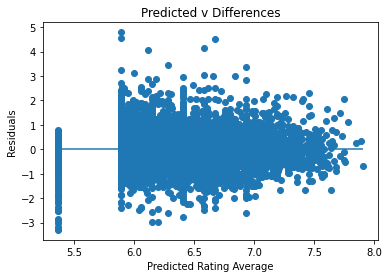

In [19]:
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.xlabel("Predicted Rating Average")
plt.ylabel("Residuals")
plt.title("Predicted v Differences")
plt.show()